<a href="https://colab.research.google.com/github/GrE3lzzz/Gittea/blob/main/My_Paypal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    auc,
    average_precision_score,
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Parameters:
        y_true (array): True labels.
        y_pred (array): Predicted labels.
        model_name (str): Name of the model for the title.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Non-Fraud", "Fraud"],
                yticklabels=["Non-Fraud", "Fraud"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Load the dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)

In [ ]:
# Display basic information
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())
print("\nClass Distribution:\n", data["Class"].value_counts(normalize=True))

Dataset Shape: (284807, 31)

First 5 Rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0

In [ ]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Normalize 'Time' and 'Amount' features
scaler = StandardScaler()
data["Time"] = scaler.fit_transform(data["Time"].values.reshape(-1, 1))
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


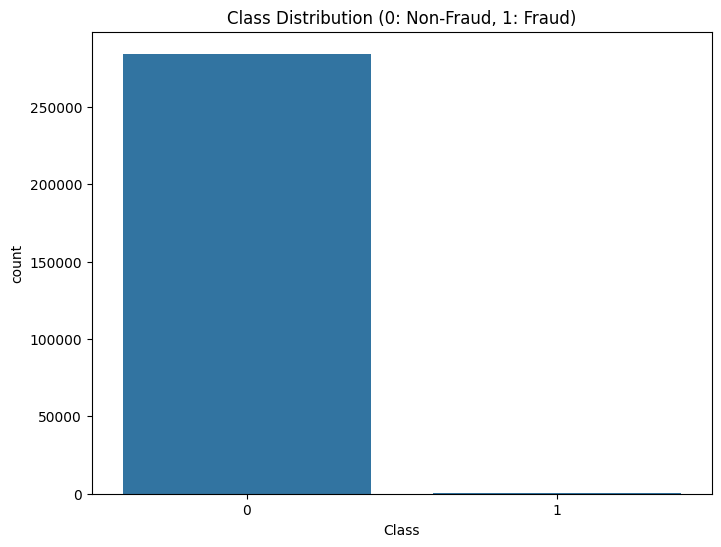

In [ ]:
# Data Exploration
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=data)
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.show()

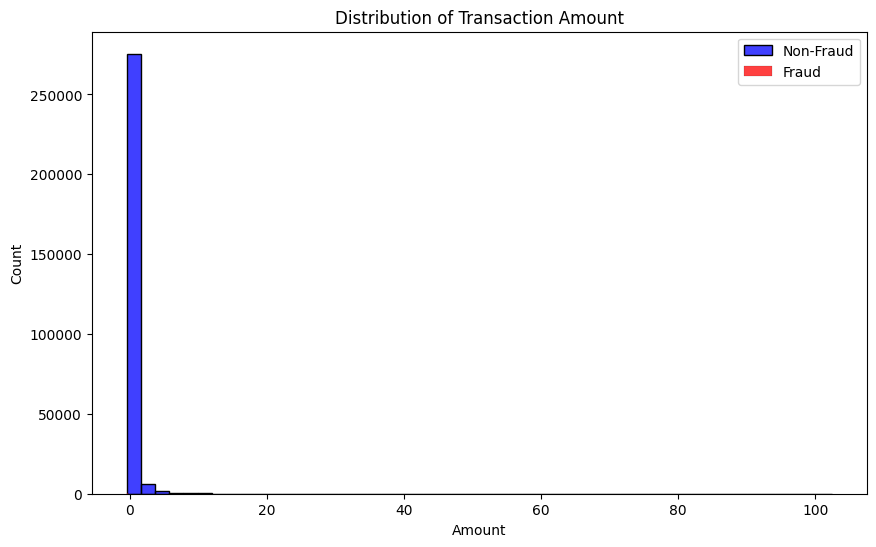

In [ ]:
# Plot distribution of 'Amount' for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data["Class"] == 0]["Amount"], bins=50, color="blue", label="Non-Fraud")
sns.histplot(data[data["Class"] == 1]["Amount"], bins=50, color="red", label="Fraud")
plt.title("Distribution of Transaction Amount")
plt.legend()
plt.show()

In [ ]:
# Split the data into features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

NameError: name 'data' is not defined

In [ ]:
# Model Building
# Logistic Regression (Baseline)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(random_state=42, scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1]))
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

Evaluation for Logistic Regression:
Confusion Matrix:
 [[55406  1458]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Area Under Precision-Recall Curve (AUPRC): 0.4883




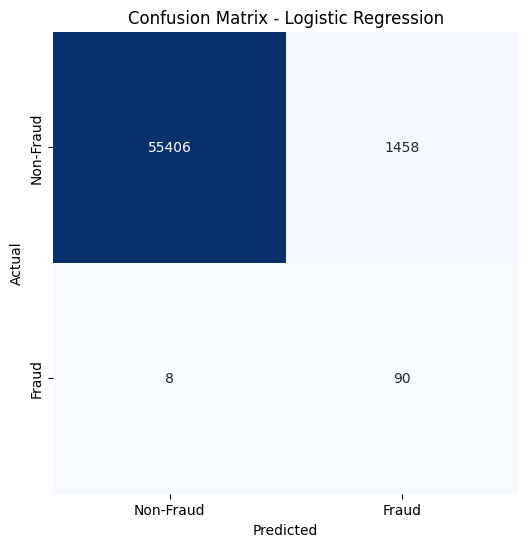

Evaluation for Random Forest:
Confusion Matrix:
 [[56849    15]
 [   16    82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Area Under Precision-Recall Curve (AUPRC): 0.8412




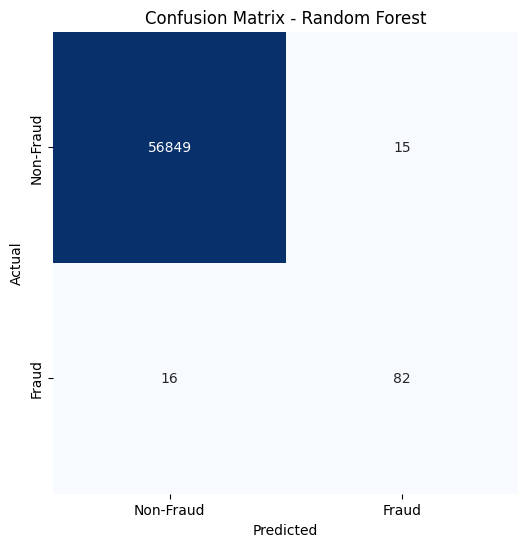

Evaluation for XGBoost:
Confusion Matrix:
 [[56832    32]
 [   11    87]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Area Under Precision-Recall Curve (AUPRC): 0.8095




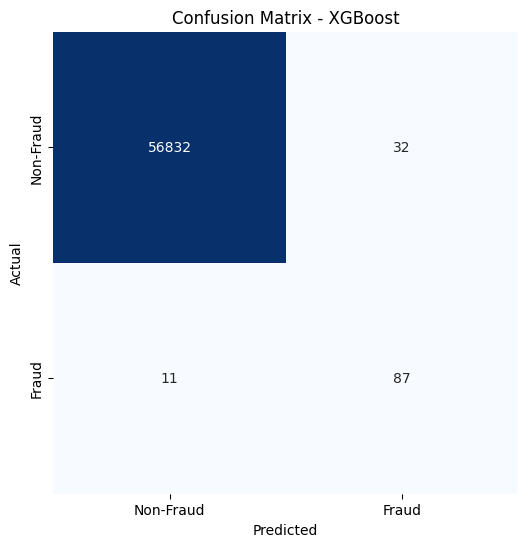

In [ ]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluates the model using classification report, AUPRC, and confusion matrix.

    Parameters:
        y_true (array): True labels.
        y_pred (array): Predicted labels.
        model_name (str): Name of the model for reporting.
    """
    print(f"Evaluation for {model_name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    auprc = auc(recall, precision)
    print(f"Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}")
    print("\n" + "=" * 50 + "\n")

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, model_name)

# Evaluate all models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

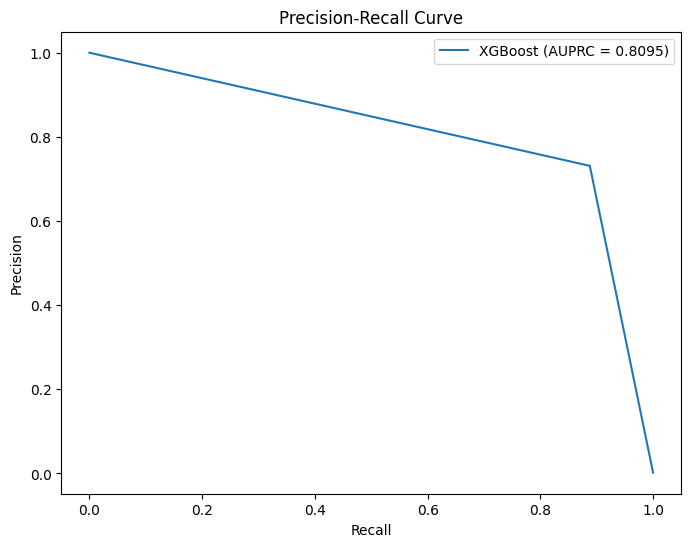

In [ ]:
# Plot Precision-Recall Curve for the best model
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"XGBoost (AUPRC = {auc(recall, precision):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

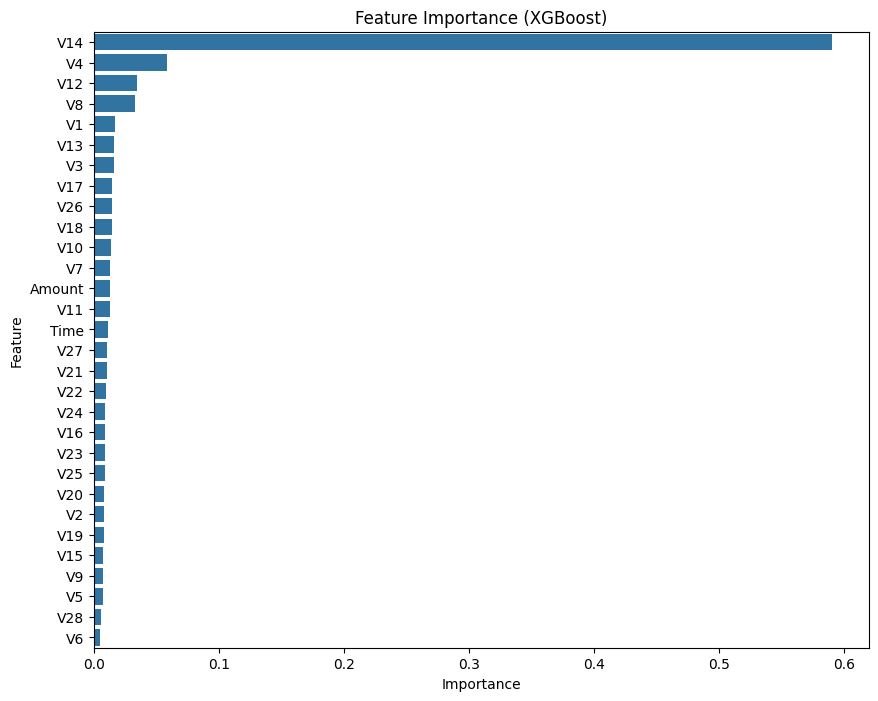

In [ ]:
# Feature Importance (XGBoost)
feature_importance = xgb.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (XGBoost)")
plt.show()